In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

In [2]:
abnyc = pd.read_csv("AB_NYC_2019.csv")

In [3]:
abnyc.drop(["host_id",'name','id','host_name','last_review'], axis=1, inplace=True)

In [4]:
abnyc.fillna({'reviews_per_month':1.37}, inplace=True)

In [5]:
abnyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


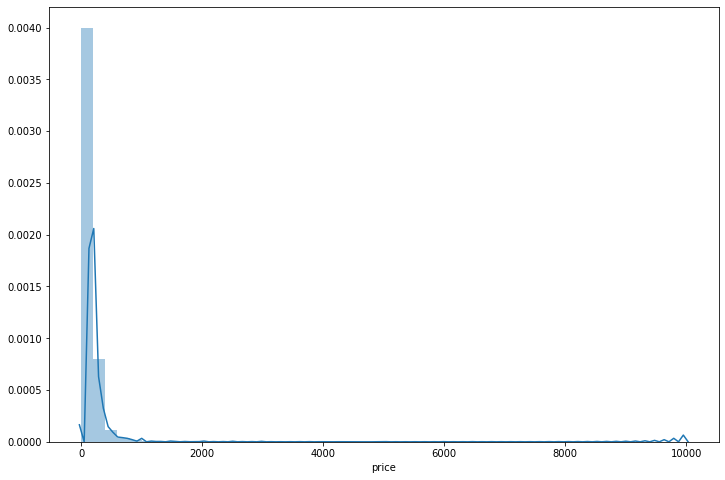

In [6]:
plt.figure(figsize=(12, 8))
sns.distplot(abnyc['price'])

In [7]:
abnyc['price_log'] = np.log(abnyc.price + 1)

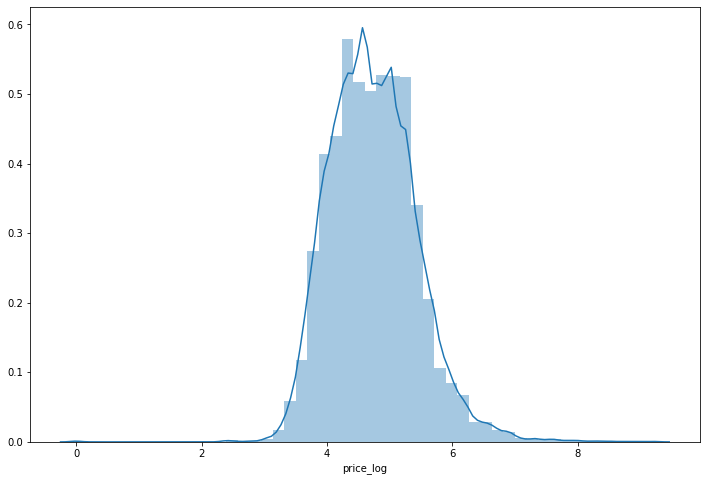

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(abnyc['price_log'])

((array([-4.18631264, -3.98032736, -3.86801681, ...,  3.86801681,
          3.98032736,  4.18631264]),
  array([0.        , 0.        , 0.        , ..., 9.21044037, 9.21044037,
         9.21044037])),
 (0.6871218845318131, 4.736884710386776, 0.9881016272577379))

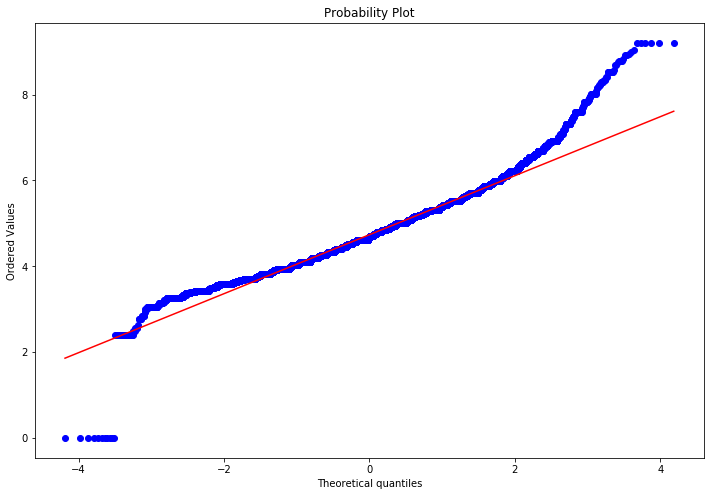

In [9]:
plt.figure(figsize=(12,8))
stats.probplot(abnyc["price_log"], plot=plt)

In [10]:
abnyc.drop(["price"], axis=1, inplace=True)
abnyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
price_log                         48895 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.1+ MB


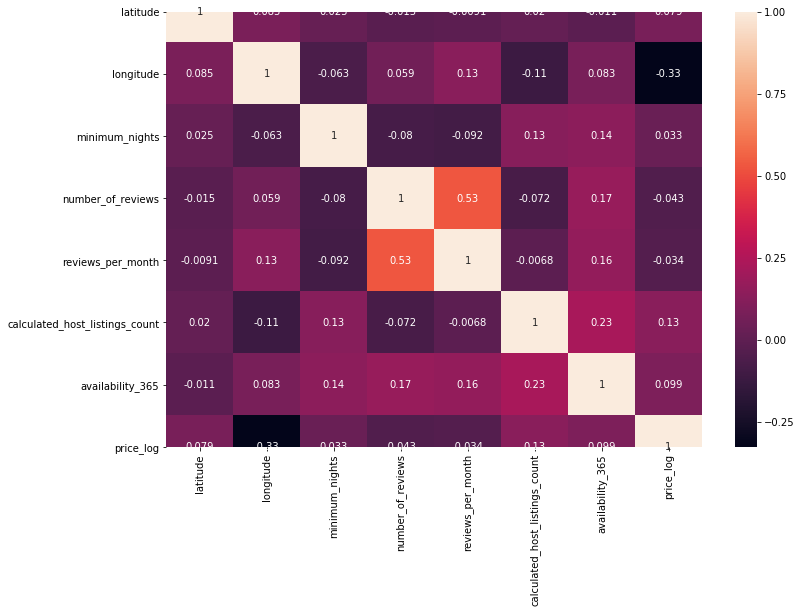

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(abnyc.corr(),annot=True)

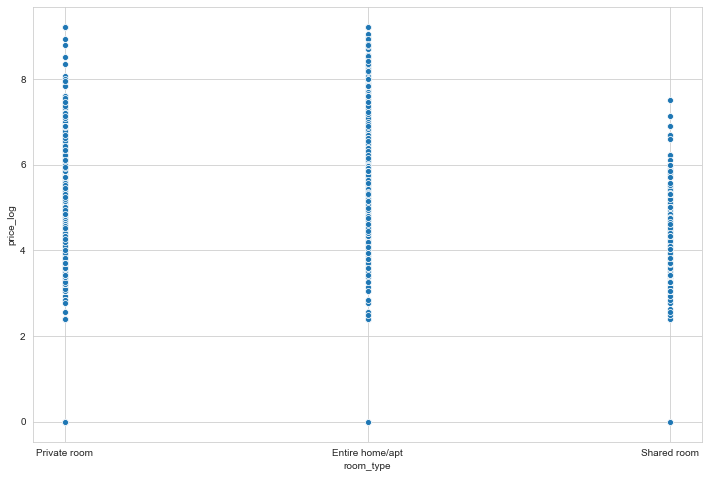

In [12]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='room_type',y='price_log',data=abnyc)

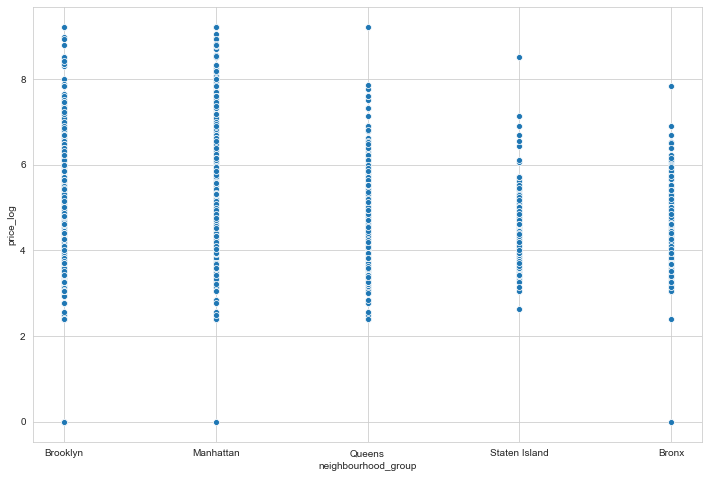

In [13]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x='neighbourhood_group',y='price_log',data=abnyc)

In [14]:
cat_feats = ['neighbourhood_group']

In [15]:
data1 = pd.get_dummies(abnyc,columns=cat_feats)

In [16]:
cat_feats = ['room_type']

In [17]:
data2 = pd.get_dummies(data1,columns=cat_feats)

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
neighbourhood                        48895 non-null object
latitude                             48895 non-null float64
longitude                            48895 non-null float64
minimum_nights                       48895 non-null int64
number_of_reviews                    48895 non-null int64
reviews_per_month                    48895 non-null float64
calculated_host_listings_count       48895 non-null int64
availability_365                     48895 non-null int64
price_log                            48895 non-null float64
neighbourhood_group_Bronx            48895 non-null uint8
neighbourhood_group_Brooklyn         48895 non-null uint8
neighbourhood_group_Manhattan        48895 non-null uint8
neighbourhood_group_Queens           48895 non-null uint8
neighbourhood_group_Staten Island    48895 non-null uint8
room_type_Entire home/apt            48895 non-null uint8
room_type_Pr

# Linear Regression

In [19]:
X = data2[['minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price_log']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.13976551e-03 -8.93596013e-04  6.73119491e-07  7.34065668e-04
 -2.01000013e-01  6.73859399e-02  3.84248843e-01 -6.87508854e-02
 -1.81883884e-01  6.52798083e-01 -1.24607848e-01 -5.28190235e-01]


In [22]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

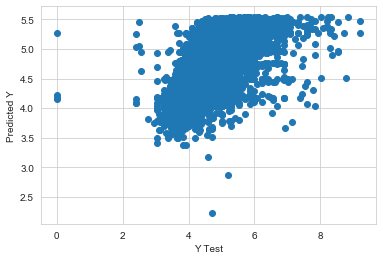

In [23]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.3695133635598256
MSE: 0.2613922120542719
RMSE: 0.5112653049584647


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.46340542515841865

# Decision Tree  and Random Forest

In [26]:
from sklearn.model_selection import train_test_split
X = data2[[ 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
predictions = dtree.predict(X_test)

Text(0, 0.5, 'Predicted Y')

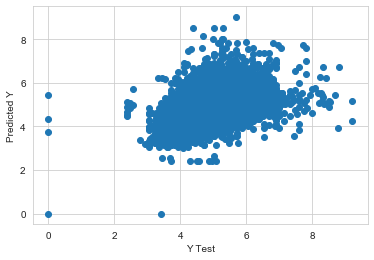

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4390996340148229
MSE: 0.37373142641758145
RMSE: 0.6113357722377952


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.46340542515841865

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
predictions = rfc.predict(X_test)

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3586874318992565
MSE: 0.24936395899333466
RMSE: 0.4993635539297343


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.48809742071022366

# Support Vector Machines

In [36]:
from sklearn.model_selection import train_test_split
X = data2[[ 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']]
y = data2['price_log']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
predictions = svr_model.predict(X_test)

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4139664063981658
MSE: 0.3175949156036053
RMSE: 0.5635556011642554


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.3420084089699822

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [43]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.1min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  49.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=  51.8s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 206.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [44]:
grid_predictions = grid.predict(X_test)

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test,grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE: 0.35528227130620177
MSE: 0.24628845116460368
RMSE: 0.496274572353454


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,grid_predictions)

0.48974079283945315